In [1]:
import pandas as pd

In [ ]:
main_df = pd.read_csv('..\mtg-jamendo-dataset\data\main_df_1.csv')
captions_df = pd.read_csv('..\mtg-jamendo-dataset\data\optpim_captions_checkpoint.csv')

In [ ]:
main_df.head(), captions_df.head()

(        TRACK_ID      ARTIST_ID      ALBUM_ID         PATH  DURATION  \
 0  track_0000948  artist_000087  album_000149   48/948.mp3     212.7   
 1  track_0000950  artist_000087  album_000149   50/950.mp3     248.0   
 2  track_0000951  artist_000087  album_000149   51/951.mp3     199.7   
 3  track_0002165  artist_000326  album_000347  65/2165.mp3     229.0   
 4  track_0002263  artist_000320  album_000366  63/2263.mp3     494.7   
 
     Mood/Theme_TAG                                          Genre_TAG  \
 0   ['background']  ['chillout', 'downtempo', 'easylistening', 'el...   
 1   ['background']  ['chillout', 'easylistening', 'electronic', 'l...   
 2   ['background']  ['ambient', 'easylistening', 'electronic', 'lo...   
 3         ['film']               ['chillout', 'fusion', 'soundtrack']   
 4  ['melancholic']                                 ['grunge', 'rock']   
 
     Instrument_TAG  
 0  ['synthesizer']  
 1  ['synthesizer']  
 2  ['synthesizer']  
 3              NaN  
 4  

In [ ]:
df_w_captions = main_df.merge(captions_df, on='TRACK_ID', how='left')
df_w_captions.head()

,TRACK_ID,ARTIST_ID,ALBUM_ID,PATH,DURATION,Mood/Theme_TAG,Genre_TAG,Instrument_TAG,caption
0,track_0000948,artist_000087,album_000149,48/948.mp3,212.7,['background'],"['chillout', 'downtempo', 'easylistening', 'el...",['synthesizer'],A dreamy synthpop track with ethereal vocals a...
1,track_0000950,artist_000087,album_000149,50/950.mp3,248.0,['background'],"['chillout', 'easylistening', 'electronic', 'l...",['synthesizer'],"A soaring, arpeggiated synth line accompanied ..."
2,track_0000951,artist_000087,album_000149,51/951.mp3,199.7,['background'],"['ambient', 'easylistening', 'electronic', 'lo...",['synthesizer'],A dynamic and pulsing electronic dance track p...
3,track_0002165,artist_000326,album_000347,65/2165.mp3,229.0,['film'],"['chillout', 'fusion', 'soundtrack']",NaN,A psychedelic rock track with trippy guitar ri...
4,track_0002263,artist_000320,album_000366,63/2263.mp3,494.7,['melancholic'],"['grunge', 'rock']",NaN,"A gritty, heavy metal track with thunderous dr..."


In [ ]:
df_w_captions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18486 entries, 0 to 18485
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRACK_ID        18486 non-null  object 
 1   ARTIST_ID       18486 non-null  object 
 2   ALBUM_ID        18486 non-null  object 
 3   PATH            18486 non-null  object 
 4   DURATION        18486 non-null  float64
 5   Mood/Theme_TAG  18486 non-null  object 
 6   Genre_TAG       18255 non-null  object 
 7   Instrument_TAG  10594 non-null  object 
 8   caption         18486 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
df_w_captions.to_csv('..\mtg-jamendo-dataset\data\main_df_with_captions.csv', index=False)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import string

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Create tokenizer that removes punctuation
tokenizer = RegexpTokenizer(r'\w+')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Process all captions
def clean_and_tokenize(text):
    # Convert to lowercase
    text = str(text).lower()
    
    # Tokenize and remove punctuation
    tokens = tokenizer.tokenize(text)
    
    # Remove stopwords and non-alphabetic tokens
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    
    return tokens

# Apply to all captions
list_captions = df_w_captions['caption'].tolist()
cleaned_tokens = [clean_and_tokenize(caption) for caption in list_captions]

# To see most common tokens
from collections import Counter
all_tokens = [token for sublist in cleaned_tokens for token in sublist]
token_freq = Counter(all_tokens).most_common(100)
print("Most common tokens:", token_freq[:20])  # Display top 20 most common tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common tokens: [('keywords', 13866), ('electronic', 9493), ('guitar', 9010), ('drums', 8751), ('piece', 7966), ('melody', 6771), ('piano', 6219), ('bass', 6077), ('synth', 5394), ('rock', 5073), ('instrumental', 4981), ('ambient', 4709), ('emotional', 4621), ('song', 4114), ('energetic', 4037), ('electric', 4036), ('synthesizers', 3810), ('groovy', 3741), ('passionate', 3687), ('dance', 3603)]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10740\670616321.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tokens[1:100], y=counts[1:100], palette='viridis')


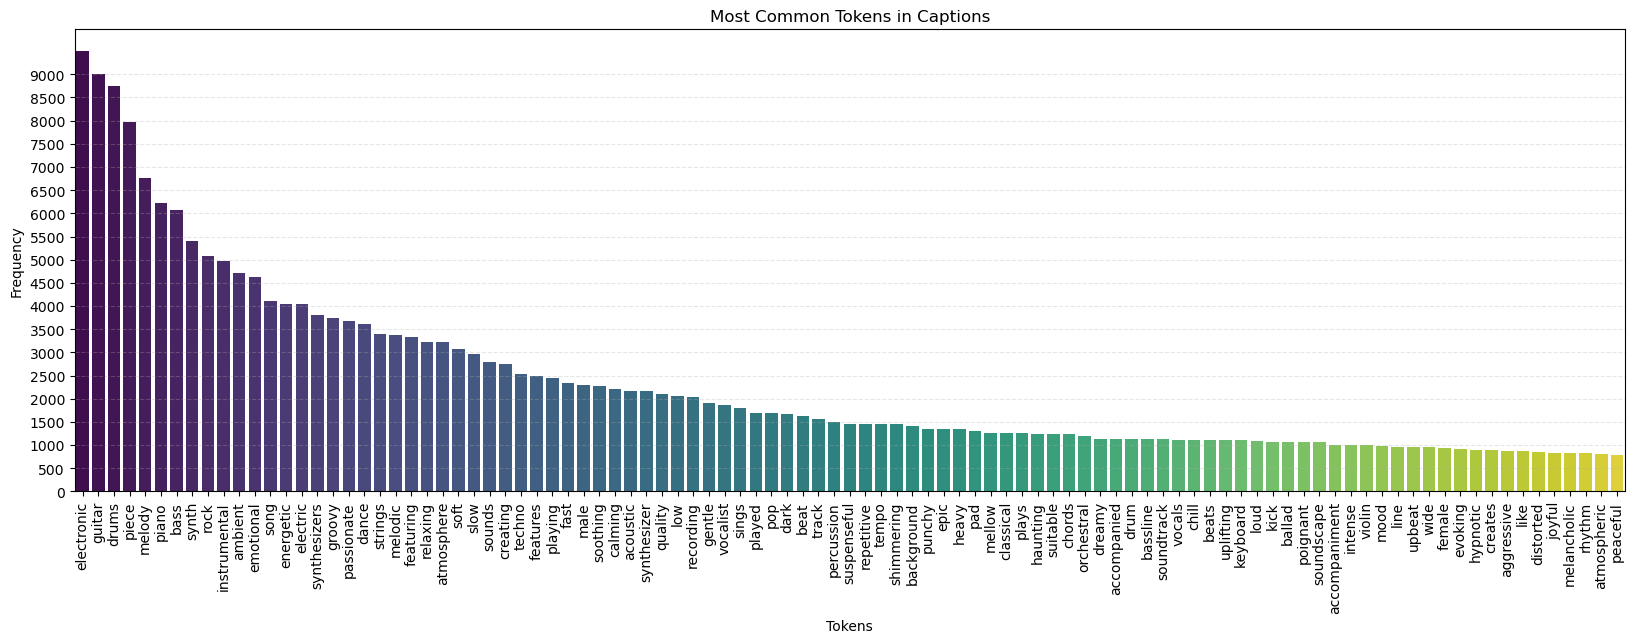

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the most common tokens
tokens, counts = zip(*token_freq)
plt.figure(figsize=(20, 6))
sns.barplot(x=tokens[1:100], y=counts[1:100], palette='viridis')
plt.xticks(rotation=90)
plt.title('Most Common Tokens in Captions')
plt.xlabel('Tokens')
plt.yticks([i for i in range(0, max(counts[1:100]) + 1, 500)])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylabel('Frequency')
plt.show()